In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
haberman=pd.read_csv('haberman.csv')
haberman

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [3]:
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


In [4]:
haberman=haberman.rename(columns={'30':'year','64':'age','1':'axil_nodes','1.1':'surv_status'})# renaming columns

In [5]:
haberman.columns #features

Index(['year', 'age', 'axil_nodes', 'surv_status'], dtype='object')

In [6]:
haberman.shape #data points=305

(305, 4)

In [7]:
haberman['surv_status'].value_counts()   # number of classes and data points per class.

1    224
2     81
Name: surv_status, dtype: int64

**Observation:**
Given dataset is imbalanced as number of data points according to each class differs very much.


# ***BIVARIATE ANALYSIS***



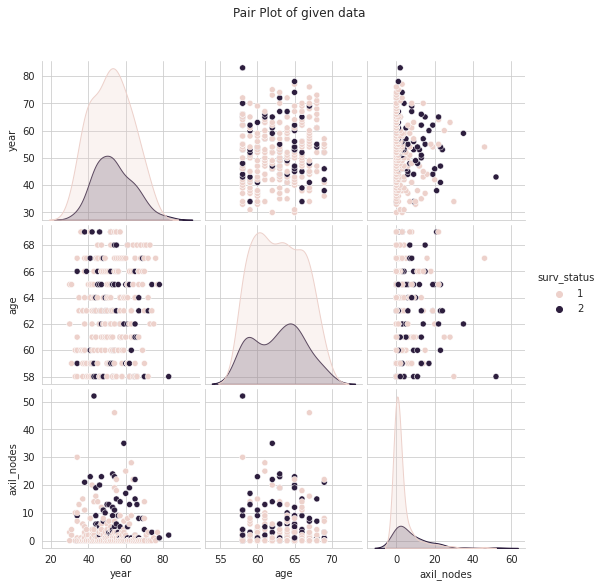

In [15]:
sns.set_style('whitegrid')
p=sns.pairplot(haberman,hue='surv_status')
p.fig.suptitle('Pair Plot of given data',y=1.08)
plt.show()

**Observations:**
1. Number of axillary nodes is the only feature that is useful to classify suvival status so far but still status 1 and 2 are overlapping.
2. Age of people is not making much difference in survival status.

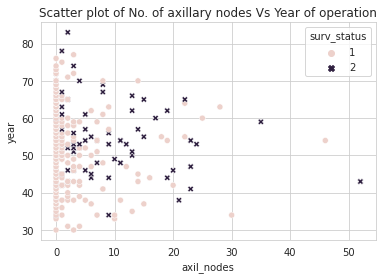

In [20]:
sns.scatterplot(x='axil_nodes',y='year',data=haberman,hue='surv_status',style='surv_status')
plt.title('Scatter plot of No. of axillary nodes Vs Year of operation')
plt.show()

**Observation:**
1. It is clear that with increase in axillary nodes the severity is increasing which resulting in survival period less than 5 years. And the people having less axillary nodes are mostly survived more than 5 years.


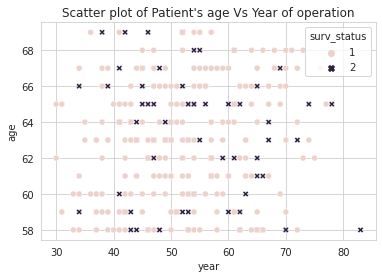

In [21]:
sns.scatterplot(x='year',y='age',data=haberman,hue='surv_status',style='surv_status')
plt.title('Scatter plot of Patient\'s age Vs Year of operation')
plt.show()

**Observation:**
Nothing is clear from above chart as point of both status 1 and status 2 are overlapping on the basis of ae and year of operation.

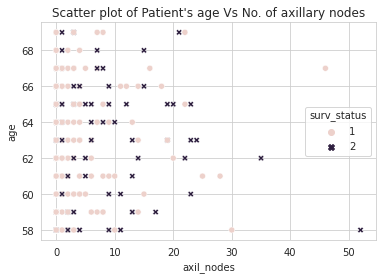

In [23]:
sns.scatterplot(x='axil_nodes',y='age',data=haberman,hue='surv_status',style='surv_status')
plt.title('Scatter plot of Patient\'s age Vs No. of axillary nodes')
plt.show()

**Observation:**
No specific data can be acquired from above plot but it is clear that disease of breast cancer is affecting woman of any age between 58-68 years and above.

# ***UNIVARIATE ANALYSIS***

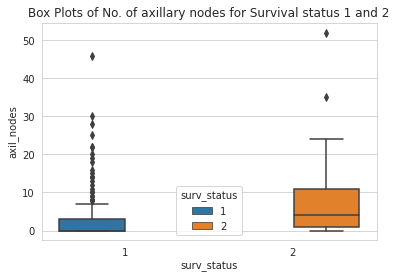

In [34]:
sns.boxplot(x='surv_status',y='axil_nodes',data=haberman,hue='surv_status')
plt.title('Box Plots of No. of axillary nodes for Survival status 1 and 2')
plt.show()

**Observation:**
1. If axillary nodes are less than 3 the person will survive more than 5 years(approximately 75% probability).
2.If axillary nodes are 3 or more then there is less chances that the person will live even 5 years.(approximately 60-65% probability). 

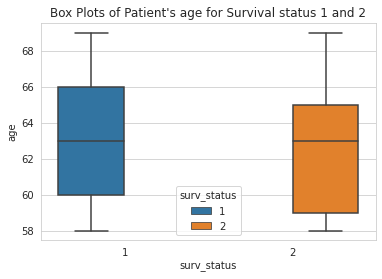

In [33]:
sns.boxplot(x='surv_status',y='age',data=haberman,hue='surv_status')
plt.title('Box Plots of Patient\'s age for Survival status 1 and 2')
plt.show()

**Observation:**
We can see that even after age above 63 years, woman are surviving more than 5 years. So age of woman cannot be taken as a important factor to determine survival status.

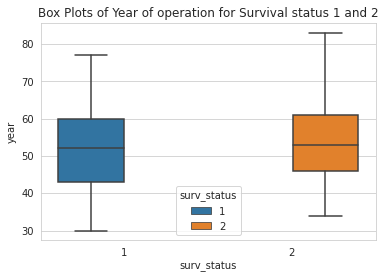

In [32]:
sns.boxplot(x='surv_status',y='year',data=haberman,hue='surv_status')
plt.title('Box Plots of Year of operation for Survival status 1 and 2')
plt.show()

**Observation:**
It can be easily seen we can't differentiate survival status on the basis of year of operation only.

In [ ]:
status1=haberman.loc[haberman.surv_status==1]
status2=haberman.loc[haberman.surv_status==2]
print(np.percentile(status1['axil_nodes'],np.arange(0,100,25)))
print(np.percentile(status2['axil_nodes'],np.arange(0,100,25)))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


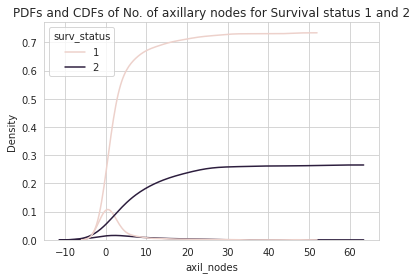

In [28]:
sns.kdeplot(data=haberman,x='axil_nodes',hue='surv_status')
sns.kdeplot(data=haberman,x='axil_nodes',hue='surv_status',cumulative=True)
plt.title('PDFs and CDFs of No. of axillary nodes for Survival status 1 and 2')
plt.show()

**Observation:**
1. At point where axillary nodes are less than 3 frequency of status 1(survival period of 5 or more years) is highest.
2. At the point where axilary nodes are 3 or more than 3 then the frequency of status 2(survival period of less than 5 years) is highest.
3. A person having axillary nodes more than 25 are rarest case.

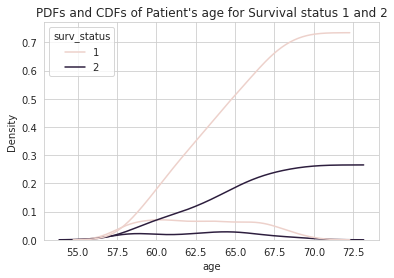

In [29]:
sns.kdeplot(data=haberman,x='age',hue='surv_status')
sns.kdeplot(data=haberman,x='age',hue='surv_status',cumulative=True)
plt.title('PDFs and CDFs of Patient\'s age for Survival status 1 and 2')
plt.show()

**Observation:**
Age cannot determine survival status. 

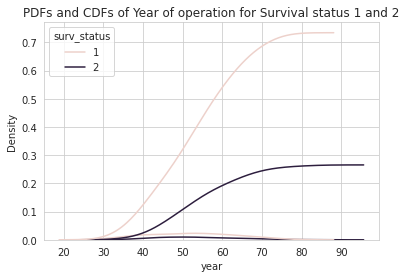

In [30]:
sns.kdeplot(data=haberman,x='year',hue='surv_status')
sns.kdeplot(data=haberman,x='year',hue='surv_status',cumulative=True)
plt.title('PDFs and CDFs of Year of operation for Survival status 1 and 2')
plt.show()

**Observation:**
Year of operation is not a factor to determine survival status.

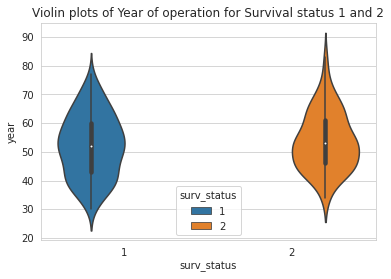

In [31]:
sns.violinplot(x='surv_status',y='year',data=haberman,hue='surv_status')
plt.title('Violin plots of Year of operation for Survival status 1 and 2')
plt.show()

**Observation:**
Women died within 5 years are more who had operation in the year between 45-55.

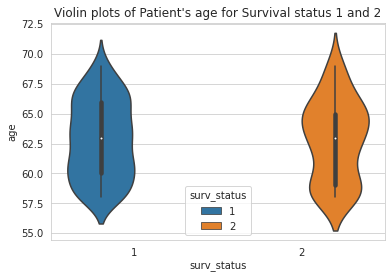

In [35]:
sns.violinplot(x='surv_status',y='age',data=haberman,hue='surv_status')
plt.title('Violin plots of Patient\'s age for Survival status 1 and 2')
plt.show()

**Observation:**
Between age of 60-62 there is a little fall in death within 5 years.

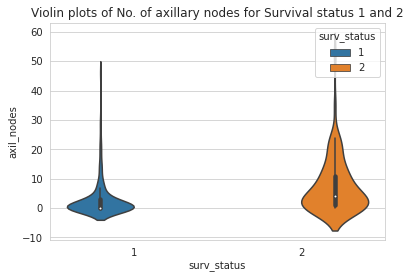

In [36]:
sns.violinplot(x='surv_status',y='axil_nodes',data=haberman,hue='surv_status')
plt.title('Violin plots of No. of axillary nodes for Survival status 1 and 2')
plt.show()

**Observation:**
It can be seen women having 1 or 2 axillary nodes are surviving more.

# ***CONCLUSION:***
1. According to the given data the survival rate is 36.16%.
2. Factors like Age and year of operation are unable determine the survival status.
3. It can be seen that women having less than 3 axillary nodes can survive more than 5 years with 75% of probability.
4. This disease is mostly affecting women of age between 55 to 70.
5. Women died within 5 years who had operation in the year between 45-50.